In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bezier
import json

In [2]:

with open('board.json') as f:
    board = json.loads(f.read())
board

{'0': {'is_in': ['y', 'z'],
  'freedom': [0, 0, 1],
  'coordinates': [0, 0, 0.9758333333333338],
  'tangents': {'z': {'after': [0, 0.22], 'before': [0, 0]},
   'y': {'before': [0.13, -0.35], 'after': [0, 0]}}},
 '1': {'is_in': ['z'],
  'freedom': [1, 1, 1],
  'coordinates': [0.11, 1.0, 0.23],
  'tangents': {'z': {'before': [-0.03, -0.12], 'after': [0.05, 0.17]},
   'x': {'before': [0, 0.16], 'after': [0, -0.1]}}},
 '2': {'is_in': ['z', 'x'],
  'freedom': [0, 0, 1],
  'coordinates': [0.5, 1.0, 0.24263888888888893],
  'tangents': {'z': {'before': [-0.22, 0.02], 'after': [0.24, -0.03]},
   'x': {'before': [0, 0.15], 'after': [0, -0.14]}}},
 '3': {'is_in': ['z', 'y'],
  'freedom': [0, 0, 1],
  'coordinates': [1, 0, 1.6700000000000002],
  'tangents': {'z': {'before': [-0.03, 0.72], 'after': [0, 0]},
   'y': {'after': [-0.05, -1.08], 'before': [0, 0]}}},
 '4': {'is_in': ['x', 'y'],
  'freedom': [0, 0, 0],
  'coordinates': [0.5, 0, 0],
  'tangents': {'y': {'after': [-0.3, 0.24], 'before': [0.

Outer  -167.92633333333336
Inner  -136.8263764
0.8147999999999997
Wood width:  0.5760000000000001


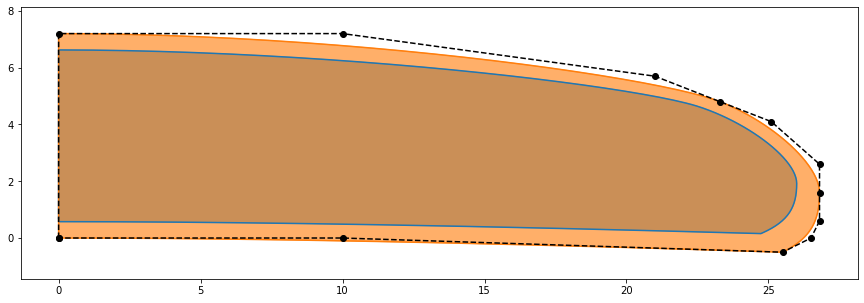

In [3]:
plt.figure(figsize=(15, 5))

list_points = [[0, 0],
               [0, 7.2],
               [10, 7.2],
               [21, 5.7],
               [23.3, 4.8],
               [25.1, 4.1],
               [26.8, 2.6],
               [26.8, 1.6],
               [26.8, 0.6],
               [26.5, 0],
               [25.5, -0.5],
               [10, 0],
               [0, 0],]

points = np.array(list_points)

rescaling = np.array([0.97, 0.84])

inner = bezier.Curve(points[:2].T, degree=1)
top = bezier.Curve(points[1:5].T, degree=3)
top_right = bezier.Curve(points[4:8].T, degree=3)
bottom_right = bezier.Curve(points[7:11].T, degree=3)
bottom = bezier.Curve(points[10:].T, degree=2)

outer = bezier.CurvedPolygon(inner, top, top_right, bottom_right, bottom)
print('Outer ', outer.area)

zooming_center = points[1]/2

points_inner = points - zooming_center
points_inner *= rescaling
points_inner += zooming_center

inner = bezier.Curve(points_inner[:2].T, degree=1)
top = bezier.Curve(points_inner[1:5].T, degree=3)
top_right = bezier.Curve(points_inner[4:8].T, degree=3)
bottom_right = bezier.Curve(points_inner[7:11].T, degree=3)
bottom = bezier.Curve(points_inner[10:].T, degree=2)

inner = bezier.CurvedPolygon(inner, top, top_right, bottom_right, bottom)
print('Inner ', inner.area)
print(inner.area/outer.area)
print('Wood width: ', points_inner[0, 1])

ax = plt.axes()
inner.plot(pts_per_edge=50, ax=ax)
outer.plot(pts_per_edge=50, ax=ax)
ax.plot(points[:, 0], points[:, 1], 'ko--')
ax.axis('equal')
plt.show()

Outer  -4742.3949999999995


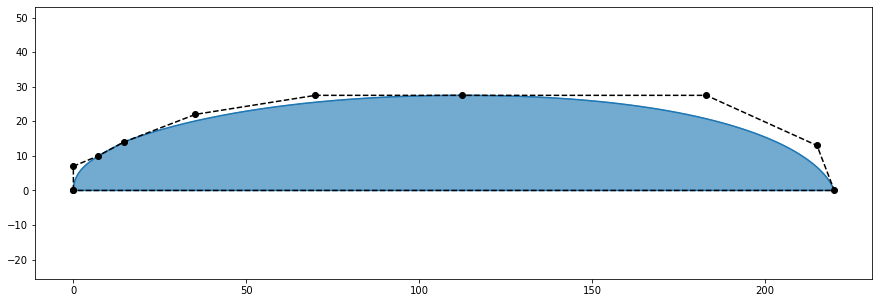

In [4]:
plt.figure(figsize=(15, 5))



points = np.array([[0, 0],
                   [0, 7],
                   [7.2, 10],
                   [14.6, 14],
                   [35.3, 22],
                   [70, 27.5],
                   [112.4, 27.5],
                   [183, 27.5],
                   [215, 13],
                   [220, 0],
                   [0, 0]
                  ])

left = bezier.Curve(points[0:4].T, degree=3)
top_left = bezier.Curve(points[3:7].T, degree=3)
top_right = bezier.Curve(points[6:10].T, degree=3)
right = bezier.Curve(points[9:].T, degree=1)

outer = bezier.CurvedPolygon(left, top_left, top_right, right)
print('Outer ', outer.area)

ax = plt.axes()
outer.plot(pts_per_edge=50, ax=ax)
ax.plot(points[:, 0], points[:, 1], 'ko--')
ax.axis('equal')
plt.show()

In [5]:

from traitlets import Unicode, Bool, validate, TraitError, List, Dict
from ipywidgets import DOMWidget, register


@register
class SurfWidget(DOMWidget):
    _view_name = Unicode('SurfView').tag(sync=True)
    _view_module = Unicode('surf_widget').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)
    
    points = List([], help="The surf points.").tag(sync=True)
    test1 = Dict({}, help="The surf points.").tag(sync=True)
    canvas_name = Unicode('canvas', help="The surf points.").tag(sync=True)
    
    # Basic validator for the surf value
    @validate('points')
    def _valid_points(self, proposal):
        # if proposal['points'].count("@") != 1:
        #     raise TraitError('Invalid surf value: it must contain an "@" character')
        # if proposal['value'].count(".") == 0:
        #     raise TraitError('Invalid surf value: it must contain at least one "." character')
        return proposal['value']
    
    @validate('test1')
    def _valid_test1(self, proposal):
        # if proposal['points'].count("@") != 1:
        #     raise TraitError('Invalid surf value: it must contain an "@" character')
        # if proposal['value'].count(".") == 0:
        #     raise TraitError('Invalid surf value: it must contain at least one "." character')
        return proposal['value']

In [6]:
%%javascript
// get canvas related references
var canvas;
var ctx;
var BB;
var offsetX;
var offsetY;
var WIDTH = 1000;
var HEIGHT = 300;

// drag related variables
var dragok = false;
var startX;
var startY;
var rescaling;
var padding = 30
var points;
var orders = {
    'z': [0, 1, 2, 3],
    'y': [7, 6, 5, 3, 4, 0],
    'x': [6, 8, 2, 9, 4],
    'x0': [10, 11, 12, 13, 14]}


class Point {
  r = 5
  isDragging = false
  children = []
  frozenX = false
  frozenY = false

  constructor(x, y, rang) {
    this.x = x;
    this.y = y;
    this.rang = rang
}

plot() {
  if (this.rang != 0) {
    ctx.fillStyle="#A0A0A0";  
} else {
    ctx.fillStyle="#444444";
}
ctx.beginPath();
ctx.arc(this.x,this.y,this.r,0,Math.PI*2);
ctx.closePath();
ctx.fill();
}
pair() {
  return [this.x, this.y]
}
update(dx, dy) {
  if (!this.frozenX) {
      this.x += dx
  }
  if (!this.frozenY) {
      this.y += dy
  }
}
}

// an array of objects that define different shapes
var local_points=[];

// draw a single rect
function rect(r) {
  ctx.fillStyle=r.fill;
  ctx.fillRect(r.x, r.y, r.width, r.height);
}

// draw a single rect
function circle(c) {
  ctx.fillStyle=c.fill;
  ctx.beginPath();
  ctx.arc(c.x,c.y,c.r,0,Math.PI*2);
  ctx.closePath();
  ctx.fill();
}

function drawCoordinates() {
    ctx.lineWidth = 1;
    ctx.beginPath();
    ctx.moveTo(padding, 0);
    ctx.lineTo(padding, HEIGHT-padding);
    ctx.lineTo(WIDTH, HEIGHT-padding);
    ctx.stroke();
    ctx.lineWidth = 2;
}

function drawPosition(mx, my) {
    ctx.clearRect(0.79*WIDTH, 0, WIDTH, 0.15*HEIGHT);
    ctx.font = "20px Arial";
    var [p_x, p_y] = fromCanvasCoordinates(mx, my)
    p_x = p_x.toFixed(2).toString(); p_y = p_y.toFixed(2).toString()
    ctx.fillText(`x: ${p_x} y: ${p_y}`, 0.80*WIDTH, 0.10*HEIGHT);
}

// clear the canvas
function clear() {
  ctx.clearRect(0, 0, WIDTH, HEIGHT);
}

// redraw the scene
function draw() {
  clear();
  drawCoordinates()
  var current_bezier = []
  // redraw each shape in the shapes[] array
  for(var i=0;i<local_points.length;i++){
    // decide if the shape is a rect or circle
    // (it's a rect if it has a width property)
    
    if (local_points[i].rang != 0) {
        var rang = local_points[i].rang
        var [from_x, from_y] = local_points[i].pair()
        var [to_x, to_y] = local_points[i + rang].pair()
        ctx.lineWidth = 1;
        ctx.beginPath();
        ctx.moveTo(from_x, from_y);
        ctx.lineTo(to_x, to_y);
        ctx.stroke();
        current_bezier.push(local_points[i])
        ctx.lineWidth = 2;
    } else {
        if (current_bezier.length != 0) {
            if (current_bezier.length == 1) {
                var [from_x, from_y] = current_bezier[0].pair()
                var [to_x, to_y] = local_points[i].pair()
                ctx.lineWidth = 2;
                ctx.beginPath();
                ctx.moveTo(from_x, from_y);
                ctx.lineTo(to_x, to_y);
                ctx.stroke();
                
            } else if (current_bezier.length == 3) {
                var [from_x, from_y] = current_bezier[0].pair()
                var [take_x, take_y] = current_bezier[1].pair()
                var [land_x, land_y] = current_bezier[2].pair()
                var [to_x, to_y] = local_points[i].pair()
                ctx.lineWidth = 2;
                ctx.beginPath();
                ctx.moveTo(from_x, from_y);
                ctx.bezierCurveTo(take_x, take_y, land_x, land_y, to_x, to_y);
                ctx.stroke();
            } else {
                colsole.error('Could not understand line')
            }
        }
        current_bezier = [local_points[i]]
    }
    local_points[i].plot();
}
}


// handle mousedown events
function myDown(e){
  BB=canvas.getBoundingClientRect();
  offsetX=BB.left;
  offsetY=BB.top;

  // tell the browser we're handling this mouse event
  e.preventDefault();
  e.stopPropagation();

  // get the current mouse position
  var mx=parseInt(e.clientX-offsetX);
  var my=parseInt(e.clientY-offsetY);

  // test each shape to see if mouse is inside
  dragok=false;
  for(var i=0;i<local_points.length;i++){
    var p=local_points[i];             
    var dx=p.x-mx;
    var dy=p.y-my;
      // test if the mouse is inside this circle
      if(dx*dx+dy*dy<p.r*p.r){
        dragok=true;
        p.isDragging=true;
        for (var j=0;j<p.children.length;j++) {
            var dir = p.children[j]
            local_points[i + dir].isDragging=true
        }
        break
        
        
    }
}
  // save the current mouse position
  startX=mx;
  startY=my;
}


// handle mouseup events
function myUp(e){
  // tell the browser we're handling this mouse event
  e.preventDefault();
  e.stopPropagation();

  // clear all the dragging flags
  dragok = false;
  for(var i=0;i<local_points.length;i++){
    local_points[i].isDragging=false;
}
}


// handle mouse moves
function myMove(e){
  BB=canvas.getBoundingClientRect();
  offsetX=BB.left;
  offsetY=BB.top;
  var mx=parseInt(e.clientX-offsetX);
  var my=parseInt(e.clientY-offsetY);
  if (mx > 0 && mx < WIDTH && my > 0 && my < HEIGHT) {
      
  

  if (dragok){

    // tell the browser we're handling this mouse event
    e.preventDefault();
    e.stopPropagation();

    // get the current mouse position

    // calculate the distance the mouse has moved
    // since the last mousemove
    var dx=mx-startX;
    var dy=my-startY;

    // move each rect that isDragging 
    // by the distance the mouse has moved
    // since the last mousemove
    for(var i=0;i<local_points.length;i++){
      var p=local_points[i];
      if(p.isDragging){
        p.update(dx, dy)
    }
}

    // redraw the scene with the new rect positions
    draw();

    // reset the starting mouse position for the next mousemove
    startX=mx;
    startY=my;

}
drawPosition(mx, my)}
}

function toCanvasCoordinates(x, y){
    y *= -rescaling
    y += HEIGHT - padding
    x *= rescaling
    x += padding
    return [x, y]
}

function fromCanvasCoordinates(x, y){
    y -= HEIGHT - padding
    y /= -rescaling
    x -= padding
    x /= rescaling
    return [x, y]
}

require.undef('surf_widget');

define('surf_widget', ["@jupyter-widgets/base"], function(widgets) {

    var SurfView = widgets.DOMWidgetView.extend({

        // Render the view.
        render: function() {
            this.canvas = document.createElement('canvas');
            this.canvas.id = this.model.get('canvas_name');
            this.canvas.width = WIDTH;
            this.canvas.height = HEIGHT;
            // listen for mouse events
            canvas=this.canvas;
            ctx=canvas.getContext("2d");
            BB=canvas.getBoundingClientRect();
            offsetX=BB.left;
            offsetY=BB.top;
            points = this.model.get('points')
            
            console.log(this.model.get('test1'))
            
            rescaling = 0
            for (var i=0; i < points.length; i++) {
             rescaling = Math.max(rescaling, points[i][0]/WIDTH, points[i][1]/HEIGHT)
         }
         rescaling = 0.9/rescaling
         
         local_points = []
         
         this.canvas.onmousedown = myDown;
         this.canvas.onmouseup = myUp;
         this.canvas.onmousemove = myMove;
         
         for (var i=0; i < points.length; i++) {
             var [x_new, y_new] = toCanvasCoordinates(points[i][0], points[i][1])
             var current_point = new Point(x_new, y_new, points[i][2])
             
             current_point.frozenX = !!points[i][3]
             current_point.frozenY = !!points[i][4]
             local_points.push(current_point);
         }
         
         for (var i=0; i < local_points.length; i++) {
             var current_point = local_points[i]
             if (current_point.rang != 0) {
                local_points[i + current_point.rang].children.push(-1 * current_point.rang)
            }
        }

            // call to draw the scene
            draw();


            this.el.appendChild(this.canvas);

            // Python -> JavaScript update
            // this.model.on('change:value', this.value_changed, this);

            // JavaScript -> Python update
            // this.email_input.onchange = this.input_changed.bind(this);
        },

        value_changed: function() {
            this.email_input.value = this.model.get('value');
        },

        input_changed: function() {
            this.model.set('value', this.email_input.value);
            this.model.save_changes();
        },
    });

    return {
        SurfView: SurfView
    };
});

<IPython.core.display.Javascript object>

In [7]:
list_points = [[0, 7.2, 0, 1, 0],
               [10, 7.2, -1, 0, 0],
               [21, 5.7, 1, 0, 0],
               [23.3, 4.8, 0, 0, 0],
               [25.1, 4.1, -1, 0, 0],
               [26.8, 2.6, 1, 0, 0],
               [26.8, 1.6, 0, 0, 0],
               [26.8, 0.6, -1, 0, 0],
               [26.5, 0, 1, 0, 0],
               [25.5, -0.5, 0, 0, 0],
               [24.5, -0.5, -1, 0, 0],
               [10, 0, 1, 0, 0],
               [0, 0, 0, 1, 1]]

surf = SurfWidget(points=list_points, canvas_name='canvas1')

list_points1 = [[0, 0, 0, 1, 1],
               [0, 7, -1, 0, 0],
               [7.2, 10, 1, 0, 0],
               [14.6, 14, 0, 0, 0],
               [35.3, 22, -1, 0, 0],
               [70, 27.5, 1, 0, 0],
               [112.4, 27.5, 0, 0, 0],
               [183, 27.5, -1, 0, 0],
               [215, 13, 1, 0, 0],
               [220, 0, 0, 0, 1]]

surf1 = SurfWidget(points=list_points1, canvas_name='canvas2')

list_points2 = [[  0. ,   7.8,   0. ,   1. ,   0. ],
       [ 27.4,   3.5,  -1. ,   0. ,   0. ],
       [ 64.7,   0. ,   1. ,   0. ,   0. ],
       [112. ,   0. ,   0. ,   0. ,   1. ],
       [159. ,   0. ,  -1. ,   0. ,   0. ],
       [204. ,   0. ,   1. ,   0. ,   0. ],
       [225.6,  12.5,   0. ,   1. ,   0. ],
       [225.6,  13.8,   0. ,   1. ,   0. ],
       [220. ,  12.3,  -1. ,   0. ,   0. ],
       [212.4,   7.3,   1. ,   0. ,   0. ],
       [112. ,   7.2,   0. ,   0. ,   1. ],
       [ 56.6,   7.2,  -1. ,   0. ,   0. ],
       [ 12. ,   8.6,   1. ,   0. ,   0. ],
       [  0. ,   9.2,   0. ,   1. ,   0. ]]

surf2 = SurfWidget(points=list_points2, canvas_name='canvas2', test1=board)

In [8]:
display(surf)

SurfWidget(canvas_name='canvas1', points=[[0, 7.2, 0, 1, 0], [10, 7.2, -1, 0, 0], [21, 5.7, 1, 0, 0], [23.3, 4…

In [9]:
display(surf1)

SurfWidget(canvas_name='canvas2', points=[[0, 0, 0, 1, 1], [0, 7, -1, 0, 0], [7.2, 10, 1, 0, 0], [14.6, 14, 0,…

In [10]:
display(surf2)

SurfWidget(canvas_name='canvas2', points=[[0.0, 7.8, 0.0, 1.0, 0.0], [27.4, 3.5, -1.0, 0.0, 0.0], [64.7, 0.0, …

In [11]:
# orders = {'z': [0, 1, 2, 3],
#           'y': [7, 6, 5, 3, 4, 0],
#           'x': [6, 8, 2, 9, 4],
#           'x0': [10, 11, 12, 13, 14]}

orders = {'z': ['0', '1', '2', '3'],
          'y': ['7', '6', '5', '3', '4', '0'],
          'x': ['6', '8', '2', '9', '4'],
          'x0': ['10', '11', '1', '12', '13']}

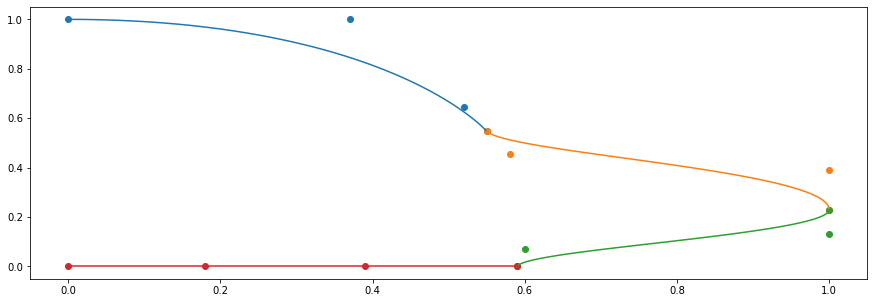

In [12]:
new_board = board

def drop_axis(axis, point):
    point = np.array(point)
    if axis == 'x':
        point = point[[1, 2]]
    elif axis == 'y':
        point = point[[0, 2]]
    elif axis == 'z':
        point = point[[0, 1]]
    return point


plt.figure(figsize=(15, 5))
ax = plt.axes()

plan = 'x'
curves = []

for first, second in zip(orders['x0'], orders['x0'][1:]):
    first = new_board[first]
    second = new_board[second]
    points = np.array([drop_axis(plan, first['coordinates']),
                       drop_axis(plan, first['coordinates']) + first['tangents'][plan]['after'],
                       drop_axis(plan, second['coordinates']) + second['tangents'][plan]['before'],
                       drop_axis(plan, second['coordinates'])])
    plt.scatter(points[:, 0], points[:, 1])
    curve = bezier.Curve(points.T, degree=3)
    curve.plot(num_pts=50, ax=ax)
    curves.append(curve)

plt.show()

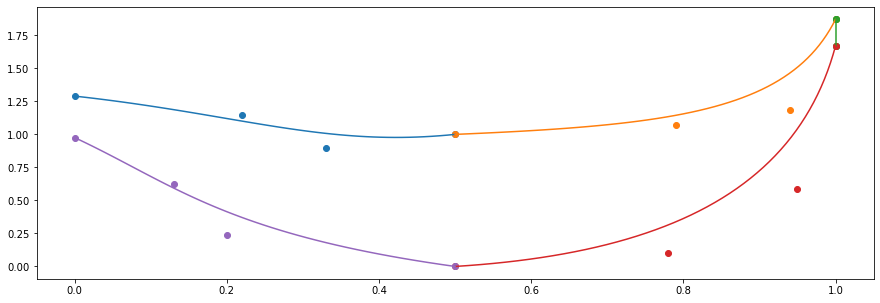

[[0.0, 1.2899999999999996, 0, 1, 7], [0.22, 1.1499999999999995, 1, 1, -1], [0.32999999999999996, 0.9000000000000005, 1, 1, -2], [0.5, 1.0000000000000004, 0, 0, 6], [0.79, 1.0700000000000005, 1, 1, -1], [0.94, 1.1811111111111112, 1, 1, -2], [1.0, 1.8711111111111112, 0, 1, 5], [1.0, 1.8711111111111112, 1, 1, -1], [1.0, 1.6700000000000002, 1, 1, -2], [1.0, 1.6700000000000002, 0, 1, 3], [0.95, 0.5900000000000001, 1, 1, -1], [0.78, 0.1, 1, 1, -2], [0.5, 0.0, 0, 0, 4], [0.2, 0.24, 1, 1, -1], [0.13, 0.6258333333333338, 1, 1, -2], [0.0, 0.9758333333333338, 0, 1, 0]]


In [13]:
new_board = board

def drop_axis(axis, point):
    point = np.array(point)
    if axis == 'x':
        point = point[[1, 2]]
    elif axis == 'y':
        point = point[[0, 2]]
    elif axis == 'z':
        point = point[[0, 1]]
    return point


plt.figure(figsize=(15, 5))
ax = plt.axes()

plan = 'y'
curves = []
all_points = []

for first_n, second_n in zip(orders[plan], orders[plan][1:]):
    first = new_board[first_n]
    second = new_board[second_n]
    points = np.array([drop_axis(plan, first['coordinates']),
                       drop_axis(plan, first['coordinates']) + first['tangents'][plan]['after'],
                       drop_axis(plan, second['coordinates']) + second['tangents'][plan]['before'],
                       drop_axis(plan, second['coordinates'])])
    plt.scatter(points[:, 0], points[:, 1])
    curve = bezier.Curve(points.T, degree=3)
    curve.plot(num_pts=50, ax=ax)
    curves.append(curve)
    all_points.append(list(drop_axis(plan, first['coordinates'])) + list(drop_axis(plan, first['freedom'])) + [int(first_n)])
    all_points.append(list(drop_axis(plan, first['coordinates']) + first['tangents'][plan]['after']) + [1, 1, -1])
    all_points.append(list(drop_axis(plan, second['coordinates']) + second['tangents'][plan]['before']) + [1, 1, -2])

all_points.append(list(drop_axis(plan, second['coordinates'])) + list(drop_axis(plan, second['freedom'])) + [int(second_n)])
plt.show()
print(all_points)

In [15]:
t = np.linspace(0, 1, 20)

def bez(t, a, b, c, d):
    inv = (1 - t)
    return inv**3 * a +  3*t * inv**2 * b + 3*t**2 * inv * c + t**3 * d

def bezier(x, points):
    result = []
    for t in x:
        inv = (1 - t)
        result.append(inv**3 * points[0] +  3*t * inv**2 * points[1] + 3*t**2 * inv * points[2] + t**3 * points[3])
    return np.array(result)

def get_t(x, points, precision=0.001, axis=0):
    a, b = 0, 1
    ea = bez(a, *points[:, axis]) - x
    while abs(a - b) > precision:
        c = (a + b)/2
        ec = bez(c, *points[:, axis]) - x
        if ea * ec > 0:
            a = c
            ea = ec 
        else:
            b = c
            eb = ec
    return c


        

points = np.array(all_points)[:4, :2]
other_points = np.array(all_points)[-4:, :2]


plt.scatter(*points.T)
plt.plot(*bezier(t, points).T)
plt.axhline(evaluate(0.2, points), 0, 1)

plt.scatter(*other_points.T)
plt.plot(*bezier(t, other_points).T)
plt.axhline(evaluate(0.2, other_points), 0, 1)

plt.show()

high, low = evaluate(0.2, points), evaluate(0.2, other_points)

In [59]:
with open('board2.json') as f:
    board2 = json.loads(f.read())

x0_real_points = []
for point in board2['x0']:
    if point[-1] >= 0:
        x0_real_points.append([point[0], point[1]])
        
x0_real_points = np.array(x0_real_points)


x_real_points = []
for point in board2['x']:
    if point[-1] >= 0:
        x_real_points.append([point[0], point[1]])
        
x_real_points = np.array(x_real_points)



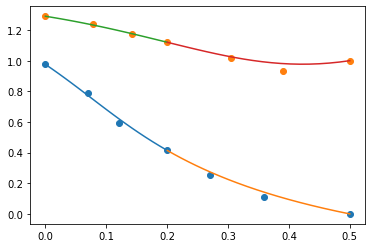

In [60]:
def subdivide(t, b00, b01, b02, b03):
    """http://web.mit.edu/hyperbook/Patrikalakis-Maekawa-Cho/node13.html"""
    pos = lambda t, a, b: a*t + b*(1-t)
    b12 = pos(t, b01, b02)
    b11 = pos(t, b00, b01)
    b13 = pos(t, b02, b03)
    b22 = pos(t, b11, b12)
    b23 = pos(t, b12, b13)
    b33 = pos(t, b22, b23)
    return np.array([b00, b11, b22, b33, b23, b13, b03])

# plt.scatter(*other_points.T)
# plt.plot(*bezier(t, other_points).T)

sub_points_high = np.flipud(subdivide(1 - get_t(0.2, other_points), *other_points))
plt.scatter(*sub_points_high.T)
plt.plot(*bezier(t, sub_points_high[:4]).T)
plt.plot(*bezier(t, sub_points_high[3:]).T)

sub_points_low = subdivide(1 - get_t(0.2, points), *points)
plt.scatter(*sub_points_low.T)
plt.plot(*bezier(t, sub_points_low[:4]).T)
plt.plot(*bezier(t, sub_points_low[3:]).T)
    

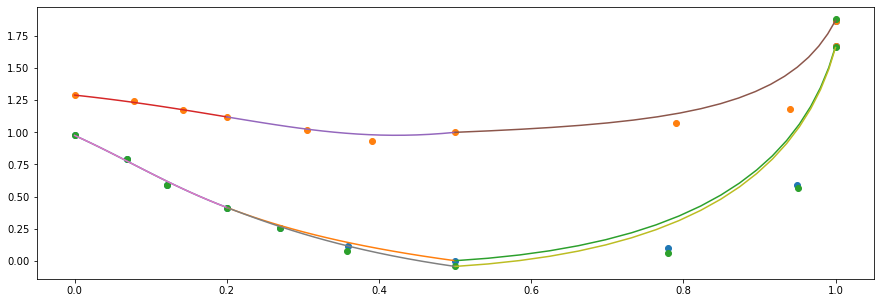

In [66]:
points_high = np.concatenate([sub_points_high, np.flipud(np.array(board2['y'])[6:10, :2])])
points_low = np.concatenate([sub_points_low, np.array(board2['y'])[4:8, :2]])
# plt.plot(*points_high.T)
# plt.plot(*points_low.T)

factors = np.ones_like(points_low)
factors[:5] = factors[:5]*x0_real_points[3][1]
factors[5:] = factors[5:]*x_real_points[3][1]
factors

plt.figure(figsize=(15, 5))

in_between = points_high*(1-factors) + points_low*factors
in_between

plt.scatter(*points_high.T)
plt.plot(*bezier(t, points_high[:4]).T)
plt.plot(*bezier(t, points_high[3:7]).T)
plt.plot(*bezier(t, points_high[6:]).T)

plt.scatter(*points_low.T)
plt.plot(*bezier(t, points_low[:4]).T)
plt.plot(*bezier(t, points_low[3:7]).T)
plt.plot(*bezier(t, points_low[6:]).T)

plt.scatter(*in_between.T)
plt.plot(*bezier(t, in_between[:4]).T)
plt.plot(*bezier(t, in_between[3:7]).T)
plt.plot(*bezier(t, in_between[6:]).T)


<Figure size 1080x360 with 0 Axes>

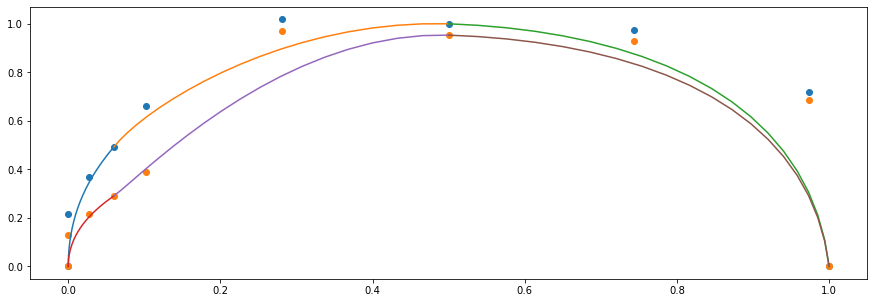

In [82]:
z_points = np.array(board2['z'])[:, :2]


plt.figure(figsize=(15, 5))

factors = np.ones_like(z_points)
factors[:5, 1] = factors[:5, 1]*x0_real_points[3][0]
factors[5:, 1] = factors[5:, 1]*x_real_points[3][0]
factors

plt.figure(figsize=(15, 5))

in_between = z_points*factors
in_between


plt.scatter(*z_points.T)
plt.plot(*bezier(t, z_points[:4]).T)
plt.plot(*bezier(t, z_points[3:7]).T)
plt.plot(*bezier(t, z_points[6:]).T)


plt.scatter(*in_between.T)
plt.plot(*bezier(t, in_between[:4]).T)
plt.plot(*bezier(t, in_between[3:7]).T)
plt.plot(*bezier(t, in_between[6:]).T)

plt.show()